In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
data_path = "/Users/bradpayne/Desktop/CS6890/project/data/training.1600000.processed.noemoticon.csv"

In [3]:
data = pd.read_csv(data_path, header=None )
data.columns = ["target", "id", "date", "flag", "user", "text"]

In [4]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Exploration

In [5]:
len(data)

1600000

In [6]:
# negative 
data["target"][data["target"] == 0].count()

800000

In [7]:
# neutral
data["target"][data["target"] == 2].count()

0

In [8]:
# positive 
data["target"][data["target"] == 4].count()

800000

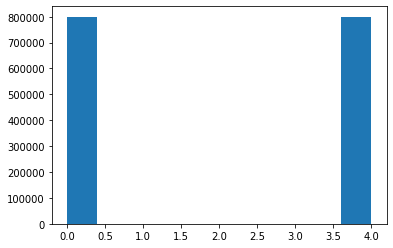

In [9]:
# target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
plt.figure()
plt.hist(data["target"])
plt.show()

In [10]:
# check to see if there is anything useful in the 'flag' column
np.where(data["flag"] != "NO_QUERY")

(array([], dtype=int64),)

```
All of the flag columns are set to NO_QUERY, so the column is not useful
```

In [11]:
data.id.nunique()

1598315

In [12]:
data.text.nunique()

1581466

In [13]:
duplicate_text = np.where(data.text.duplicated())

In [14]:
data.loc[duplicate_text].head()

,target,id,date,flag,user,text
1940,0,1468267465,Tue Apr 07 00:38:38 PDT 2009,NO_QUERY,ei8htyOne,and so the editing of 3000 wedding shots begins
2149,0,1468316454,Tue Apr 07 00:56:00 PDT 2009,NO_QUERY,Augustina22CA,"im lonely keep me company! 22 female, california"
3743,0,1468664220,Tue Apr 07 03:02:08 PDT 2009,NO_QUERY,FranciscoAndre,I'm not liking that new iTunes Pricing at all....
3746,0,1468664704,Tue Apr 07 03:02:17 PDT 2009,NO_QUERY,ammaryasir,"cant eat, drink or breath properly thanks to t..."
4163,0,1468756463,Tue Apr 07 03:33:56 PDT 2009,NO_QUERY,lkm1989,has a cold


In [15]:
# unique users 
data.user.nunique()

659775

In [ ]:
plt.figure()
plt.hist(data["user"])
plt.show()

In [17]:
from datetime import datetime

In [18]:
data["date"][0]

'Mon Apr 06 22:19:45 PDT 2009'

In [ ]:
datetime.strptime("PDT", "%Z")

ValueError: time data 'PDT' does not match format '%Z'

In [19]:
datetime.strptime(data["date"][0], "%a %b %d %H:%M:%S PDT %Y")

datetime.datetime(2009, 4, 6, 22, 19, 45)

In [20]:
data["formated_date"] = data["date"].apply(lambda x: datetime.strptime(x, "%a %b %d %H:%M:%S PDT %Y"))

In [21]:
data["formated_date"].describe()

/var/folders/37/7mzk5kw57r7g8szv12sz9g7r0000gn/T/ipykernel_22857/1792313948.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data["formated_date"].describe()


count                 1600000
unique                 774363
top       2009-06-15 12:53:14
freq                       20
first     2009-04-06 22:19:45
last      2009-06-25 10:28:31
Name: formated_date, dtype: object

In [22]:
data["date"].min()

'Fri Apr 17 20:30:31 PDT 2009'

In [23]:
data["date"].max()

'Wed May 27 07:27:38 PDT 2009'

In [24]:
data["date"].describe()

count                          1600000
unique                          774363
top       Mon Jun 15 12:53:14 PDT 2009
freq                                20
Name: date, dtype: object

## Text Cleaning

In [25]:
data.text[501]

'@cleders sorry...i was rooting for them too... '

In [26]:
import re

In [27]:
# remove punctuation, replace elipses with spaces 
test_text = re.sub(r'\.{3,}', " ", data.text[501])
re.sub(r'[^A-Za-z0-9 ]+', "", test_text)

'cleders sorry i was rooting for them too  '

In [ ]:
!pip install tweet-preprocessor

In [28]:
import nltk
import preprocessor as p
import re
p.set_options(p.OPT.URL, p.OPT.MENTION, p.OPT.RESERVED, p.OPT.NUMBER)

In [29]:
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bradpayne/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
stopwords = [re.sub(r'[^a-z]+', "", word) for word in stopwords]
stopwords.append("")

```
By default, p clean removes the following,
Can be customized 
https://pypi.org/project/tweet-preprocessor/
Option Name	Option Short Code
URL	p.OPT.URL
Mention	p.OPT.MENTION
Hashtag	p.OPT.HASHTAG
Reserved Words	p.OPT.RESERVED
Emoji	p.OPT.EMOJI
Smiley	p.OPT.SMILEY
Number	p.OPT.NUMBER
```

In [31]:
# remove urls, 
test_text = p.clean(test_text).lower()

In [32]:
test_text

'sorry i was rooting for them too'

In [33]:
[word for word in test_text.split(" ") if word not in stopwords]

['sorry', 'rooting']

In [34]:
data.target[501]

0

In [35]:
data["clean_text"] = data.text.apply(lambda text: p.clean(text).lower())

In [36]:
data["text"][99972]

'isPlayer Has Died! Sorry '

In [37]:
data["text"].describe()

count                       1600000
unique                      1581466
top       isPlayer Has Died! Sorry 
freq                            210
Name: text, dtype: object

In [38]:

def clean_text(text, stopwords=stopwords):
    """ cleans text of urls, emojis, 

    Args:
        text (str): tweet text
        stopwords (list, optional): list of stopwords. Defaults to nltk.english.stopwords.

    Returns:
        list: list of words in tweet after preprocessing
    """
    text = p.clean(text).lower()
    text = text.lower()
    text = re.sub(r'\.{3,}', " ", text)
    text = re.sub(r'&[A-Za-z]*;', "", text)
    text = re.sub(r'[^A-Za-z0-9 ]+', "",text)
    return " ".join([word for word in text.split(" ") if word not in stopwords])

In [39]:
re.sub(r'&[A-Za-z]*;', "", data["text"][3456])

"The Muppet Whatnot Workshop site is temporarily down, apparently totally sold out Working hard to get it back ASAP  Hurry up, y'all. "

In [40]:
clean_text(data["text"][3456])

'muppet whatnot workshop site temporarily apparently totally sold working hard get back asap hurry yall'

In [41]:
data["clean_text"] = data.text.apply(lambda text: clean_text(text))

In [42]:
data.head(10)

,target,id,date,flag,user,text,formated_date,clean_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",2009-04-06 22:19:45,awww thats bummer shoulda got david carr third...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,2009-04-06 22:19:49,upset cant update facebook texting might cry r...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,2009-04-06 22:19:53,dived many times ball managed save rest go bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,2009-04-06 22:19:57,whole body feels itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",2009-04-06 22:19:57,behaving im mad cant see
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,2009-04-06 22:20:00,whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,2009-04-06 22:20:03,need hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,2009-04-06 22:20:03,hey long time see yes rains bit bit lol im fin...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,2009-04-06 22:20:05,nope
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,2009-04-06 22:20:09,que muera


## Vectorization

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
def getBOWRepresentation(tweets):    
    vectorizer = CountVectorizer(stop_words=None)
    vectorizer.fit(tweets)
    bow_representation = vectorizer.transform(tweets)
    return bow_representation, vectorizer

In [45]:
BOW, vectorizer = getBOWRepresentation(data["clean_text"].to_numpy())

In [46]:
vectorizer.vocabulary_

{'awww': 23696,
 'thats': 302091,
 'bummer': 45606,
 'shoulda': 272391,
 'got': 123153,
 'david': 74098,
 'carr': 50805,
 'third': 303972,
 'day': 74283,
 'upset': 323969,
 'cant': 49678,
 'update': 323503,
 'facebook': 100208,
 'texting': 301143,
 'might': 193114,
 'cry': 69782,
 'result': 253846,
 'school': 264386,
 'today': 308067,
 'also': 12410,
 'blah': 36017,
 'dived': 82227,
 'many': 185423,
 'times': 306442,
 'ball': 26613,
 'managed': 184589,
 'save': 263092,
 'rest': 253648,
 'go': 120841,
 'bounds': 40649,
 'whole': 337816,
 'body': 38271,
 'feels': 103451,
 'itchy': 152579,
 'like': 174557,
 'fire': 105823,
 'behaving': 31097,
 'im': 146712,
 'mad': 182573,
 'see': 266417,
 'crew': 68821,
 'need': 207198,
 'hug': 142188,
 'hey': 135632,
 'long': 177896,
 'time': 306222,
 'yes': 350307,
 'rains': 247036,
 'bit': 35221,
 'lol': 177278,
 'fine': 105462,
 'thanks': 301707,
 'hows': 141479,
 'nope': 213033,
 'que': 245240,
 'muera': 201966,
 'spring': 284853,
 'break': 41989,
 

In [47]:
len(vectorizer.vocabulary_)

354940

## Tokenize

In [12]:
from keras.preprocessing.text import Tokenizer

In [13]:
tokenizer = Tokenizer(filters="@")
tokenizer.fit_on_texts(data.clean_text)

In [15]:
X_tokenized = tokenizer.texts_to_sequences(data.clean_text)

In [16]:
X_tokenized[0]

[339, 41, 1049, 3286, 13, 753, 9674, 1736, 3]

In [22]:
import keras

In [23]:
max_length = 0
for t in X_tokenized:
    max_length = max(max_length, len(t))

In [24]:
max_length

35

In [92]:
X_pad = keras.preprocessing.sequence.pad_sequences(X_tokenized, 10, padding="post", truncating="post" )

In [74]:
X_pad[0]

array([ 339,   41, 1049, 3286,   13,  753, 9674, 1736,    3,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

## Split into Train, Test, and Validation

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# X_train, X_test, y_train, y_test = train_test_split(X_pad, data["target"].to_numpy())
X_train, X_test, y_train, y_test = train_test_split(BOW, data["target"].to_numpy())

## ML Algorithm

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

In [52]:
clf.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1)

In [57]:
# clf.predict(X_pad[0:10])

In [58]:
clf.score(X_train, y_train)

0.9888241666666666

In [59]:
clf.score(X_test, y_test)

0.770765

In [69]:
def create_train_score(ClassiferClass, args={}):
    clf = ClassiferClass(**args)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    print(f"Training Score: {train_score:.4}")
    test_score = clf.score(X_test, y_test)
    print(f"Testing Score: {test_score:.4}")


In [60]:
del clf

In [61]:
from sklearn.naive_bayes import GaussianNB

In [71]:
clf = GaussianNB()
clf.fit(X_train.toarray(), y_train)


Error: Canceled future for execute_request message before replies were done

In [ ]:
train_score = clf.score(X_train.toarray(), y_train)
print(f"Training Score: {train_score:.4}")
test_score = clf.score(X_test.toarray(), y_test)
print(f"Testing Score: {test_score:.4}")

## Evalute Model

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
y_test.shape

(400000,)

In [37]:
y_pred[0:25]

array([4, 4, 4, 0, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0,
       0, 4, 0])

In [55]:
# accuracy of training set
accuracy_score(y_train, clf.predict(X_train))

0.9888241666666666

In [56]:
# Accuracy of the test set 
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.770765

In [50]:
rep = vectorizer.transform(("love flying",))

NameError: name 'vectorizer' is not defined

In [114]:
rep

<1x762202 sparse matrix of type '<class 'numpy.int64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [115]:
clf.predict(rep)

array([4])